In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df=pd.read_csv('LoanData.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [42]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [43]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [44]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [45]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [46]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [47]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].median())

In [48]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

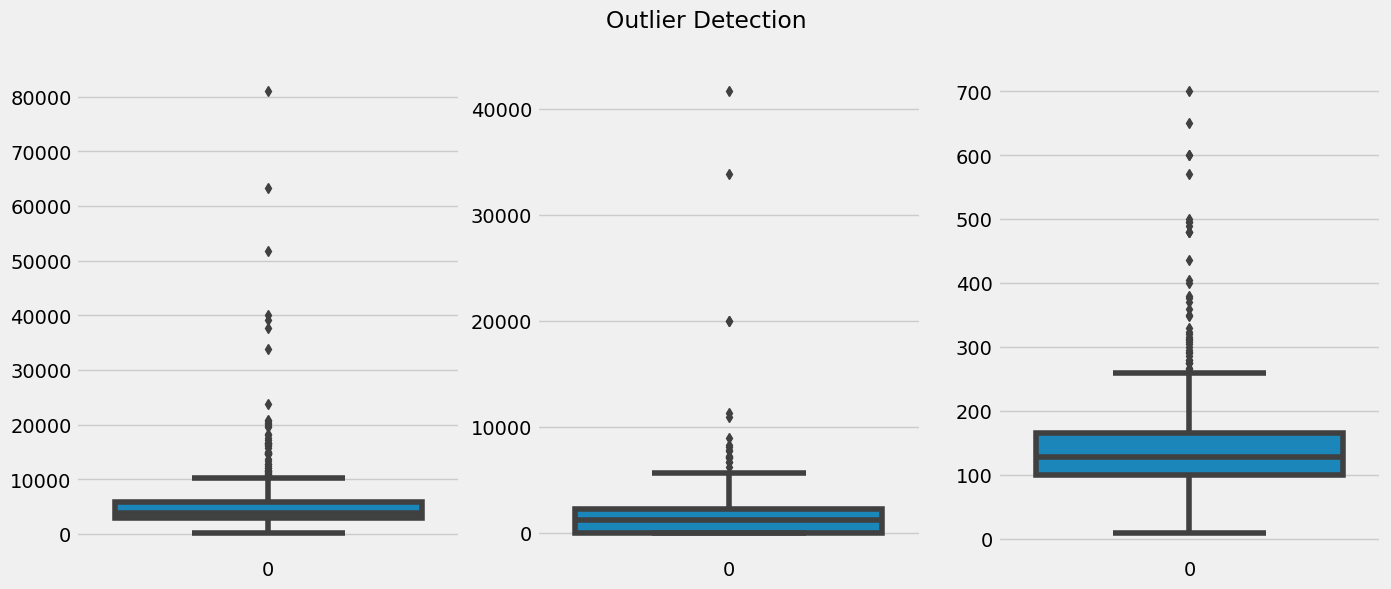

In [49]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(15,6)

plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])

plt.suptitle('Outlier Detection')
plt.show()

In [50]:
print('Before Removing Outliers',df.shape)
df=df[df['ApplicantIncome']<25000]
print('After Removing Outliere',df.shape)

Before Removing Outliers (614, 13)
After Removing Outliere (607, 13)


In [51]:
print('Before Removing Outliers',df.shape)
df=df[df['CoapplicantIncome']<12000]
print('After Removing Outliers',df.shape)

Before Removing Outliers (607, 13)
After Removing Outliers (603, 13)


In [52]:
print('Before Removing Outliers',df.shape)
df=df[df['LoanAmount']<400]
print('After Removing Outliers',df.shape)

Before Removing Outliers (603, 13)
After Removing Outliers (591, 13)


C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5104\1332676620.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'],color='green')
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5104\1332676620.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'],color='gree

<Axes: xlabel='LoanAmount', ylabel='Density'>

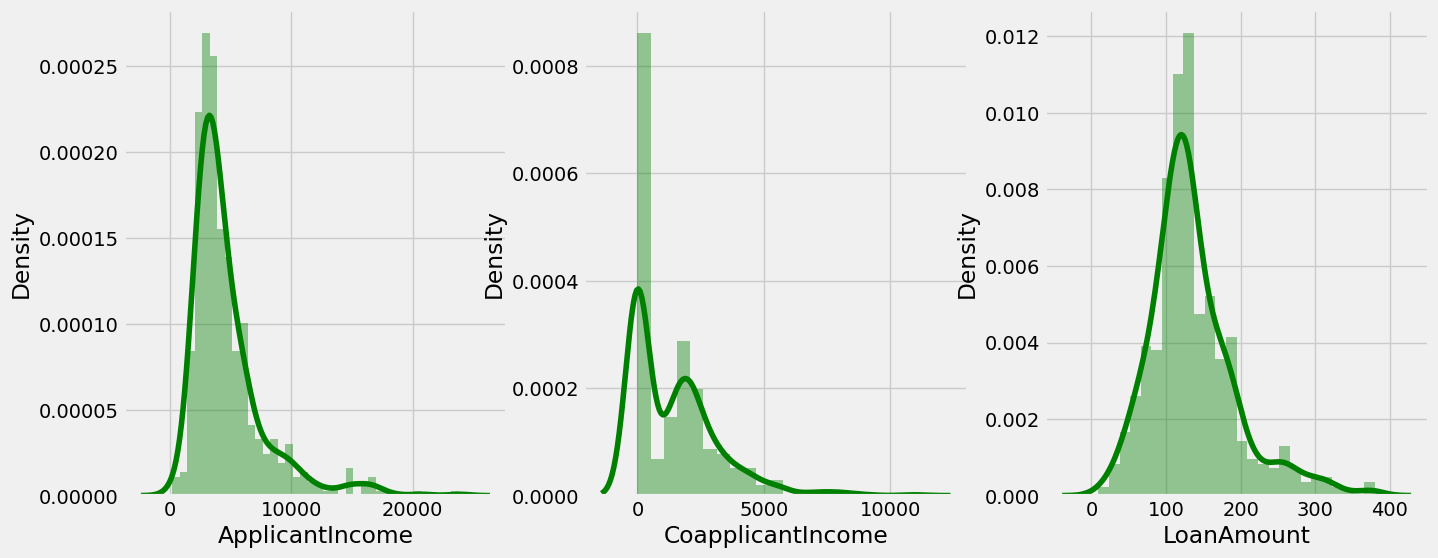

In [15]:
plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'],color='green')

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'],color='green')

plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'],color='green')

C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5104\1757517880.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'],color='green')
C:\Users\ELCOT\AppData\Local\Temp\ipykernel_5104\1757517880.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'],color='gree

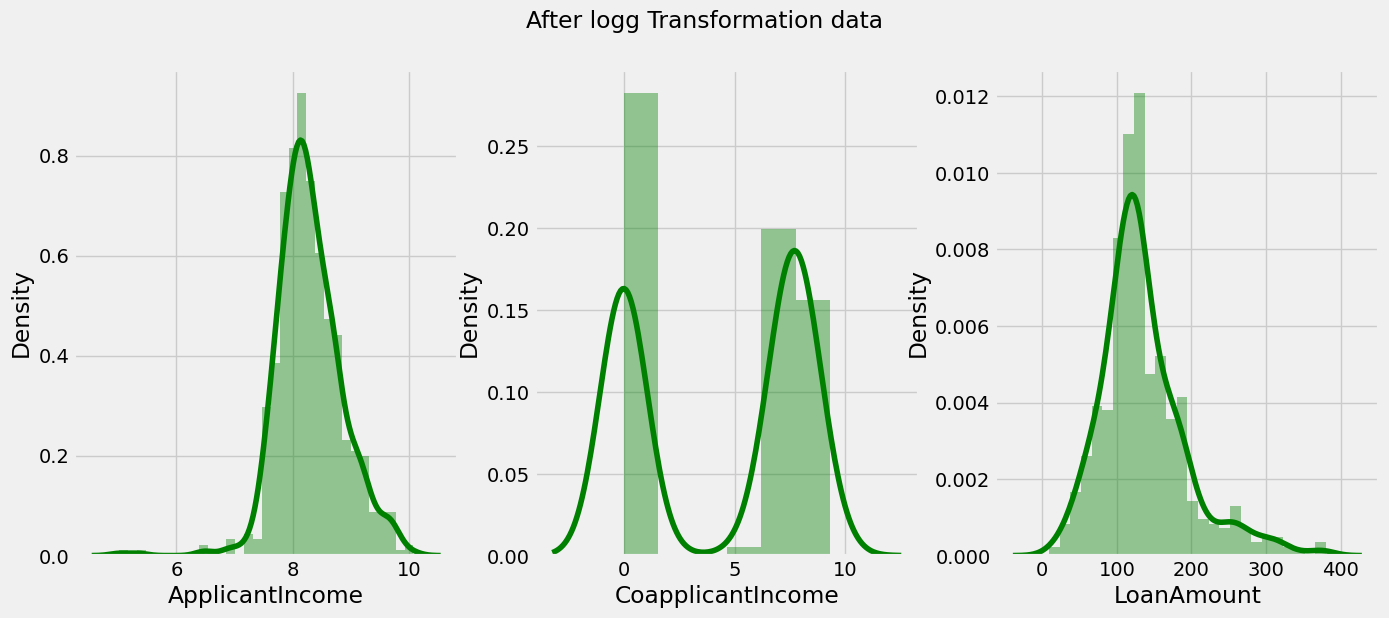

In [53]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=np.log1p(df['CoapplicantIncome'])

plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'],color='green')

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'],color='green')

plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'],color='green')

plt.suptitle('After logg Transformation data')
plt.show()

In [54]:
numerical=df.select_dtypes('number').columns.tolist()
categorical=df.select_dtypes('object').columns.tolist()

In [55]:
numerical

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [56]:
categorical

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

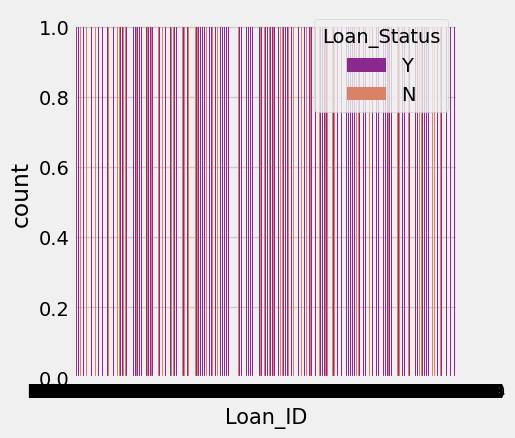

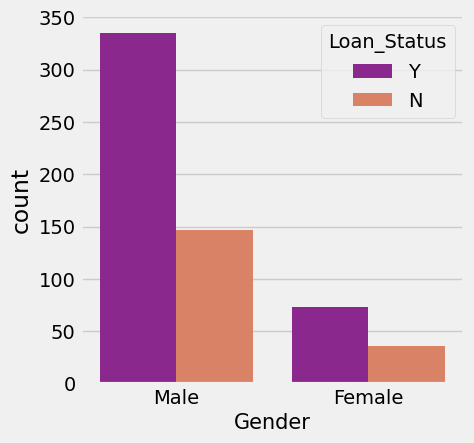

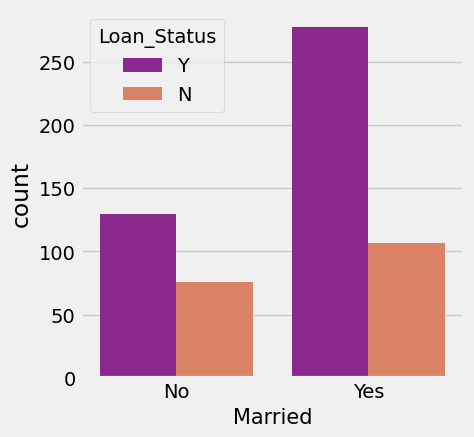

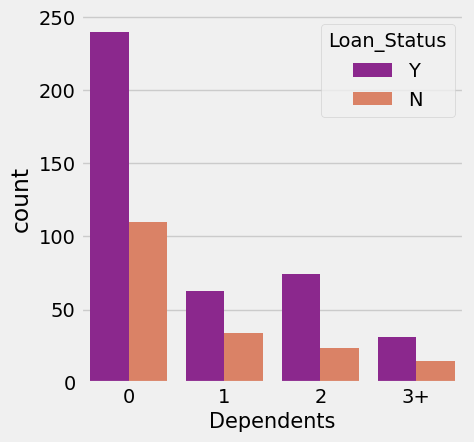

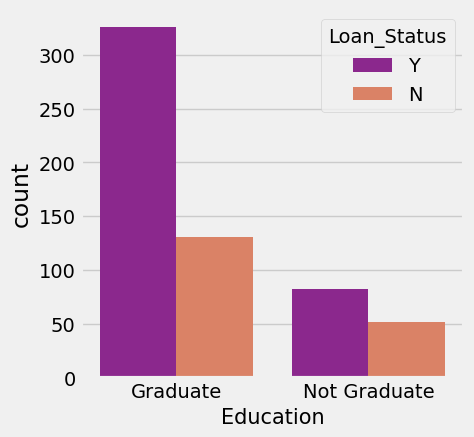

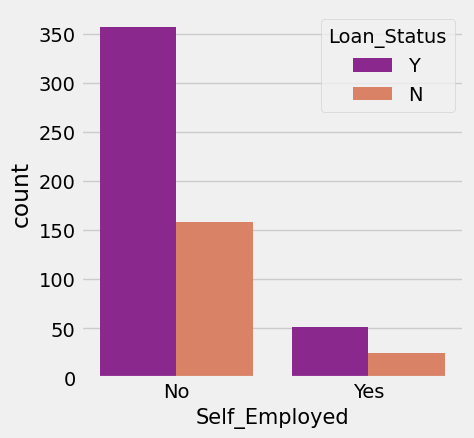

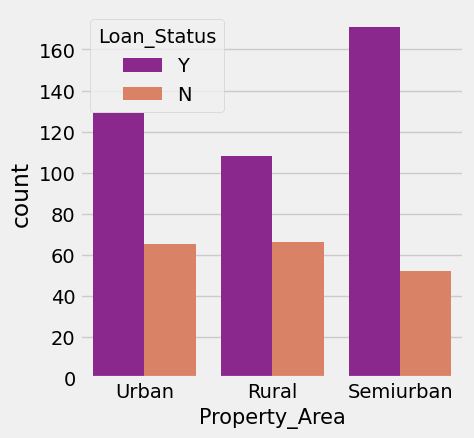

In [57]:
for i in categorical[:-1]:
    plt.figure(figsize=(15,10))
    plt.subplot(2,3,1)
    sns.countplot(x=i,hue='Loan_Status',data=df,palette='plasma')
    plt.xlabel(i,fontsize=15)
    

In [58]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [59]:
print(pd.crosstab(df['Loan_Status'],df['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [60]:
print(pd.crosstab(df['Loan_Status'],df['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


In [61]:
print(pd.crosstab(df['Loan_Status'],df['Self_Employed']))

Self_Employed   No  Yes
Loan_Status            
N              158   25
Y              357   51


In [62]:
print(pd.crosstab(df['Loan_Status'],df['Property_Area']))

Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         52     65
Y                108        171    129


In [63]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [64]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [65]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})

In [66]:
df['Married']=df['Married'].map({'Yes':1,'No':0})

In [67]:
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})

In [68]:
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

In [69]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [70]:
df['Property_Area']=df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2})

In [71]:
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [72]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,0,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,1,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,0,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,0,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,0,1


In [73]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [74]:
df['Dependents']=df['Dependents'].map({'0':0, '1':1, '2':1, '3+':1})

In [75]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,0,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,1,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,0,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,0,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,0,1


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

# HANDLING IMBALANCE DATA

In [79]:
from imblearn.over_sampling import SMOTE

In [80]:
x_resample,y_resample=SMOTE().fit_resample(x,y.values.ravel())

In [81]:
print(x_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [89]:
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=0)

# MODEL BUILDING

In [86]:
from sklearn.linear_model import LogisticRegression

In [101]:
model=LogisticRegression()

In [102]:
model.fit(x_train,y_train)

C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred=model.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score,classification_report

In [104]:
accuracy=accuracy_score(y_pred,y_test)
print('Accuracy_score:',accuracy)

Accuracy_score: 0.7804878048780488


In [96]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        70
           1       0.85      0.74      0.80        94

    accuracy                           0.78       164
   macro avg       0.78      0.79      0.78       164
weighted avg       0.79      0.78      0.78       164



In [106]:
new_data=np.array([[1,1,1,0,0,234,423,231.5,123,1,1]])

In [108]:
predict=model.predict(new_data)
if predict==1:
    print('Person will get Loan')
else:
    print('Person will not get loan')

Person will not get loan


C:\Users\ELCOT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
